# Data Fair 2024 Data Challenge  - Team DataMinds

***Team***
1. Dela Kwame Adoboe
2. Michael Kofi Boateng Nyarko

# Credit Risk Analysis: *Assessing likelihood of loan default*

**Introduction**  
Asessing credit risk is crucial for lenders and financial institutions in today's finacial landscape.  
This project aims to build a predictive model to determine the likelihood of loan default as well as generating insights relevant to financial institutions.
 


**About the Dataset**  
This dataset provides essential information about loan applicants and their characteristics.  
It comprises of 12 columns ans 32,581 rows.

**Column Descriptions:**  
`id`: Unique identifier for each loan applicant.  
`age`: Age of the loan applicant.  
`income`: Income of the loan applicant.  
`home`: Home ownership status (Own, Mortgage, Rent).  
`emp_length`: Employment length in years.  
`intent`: Purpose of the loan (e.g., education, home improvement).  
`amount`: Loan amount applied for.  
`rate`: Interest rate on the loan.  
`status`: Loan approval status (Fully Paid, Charged Off, Current).  
`percent_income`: Loan amount as a percentage of income.  
`default`: Whether the applicant has defaulted on a loan previously (Yes, No).  
`cred_length`: Length of the applicant's credit history.

**Objectives**
- Build predictive model(s) to determine loan default
- Generate insights relevant to the case

**Workflow**
1. Perform EDA
2. Data Cleaning & Preporocessing
3. Building Machine Learning model(s)
4. Model Evaluation
5. Conclusion and Recommendation

In [6]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Loading dataset
df = pd.read_csv('credit_risk.csv')

## Exploratory Data Analysis

In [9]:
# Concise summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


*Dataframe consists of **12** fields and **32,581** records.*

*Datatype of `Id` column would have to be changed to 'object' since no mathematical computation would be performed in it.  
Datatype of `Emp_length` would also be changed to 'int' since all observations contain a '0' after the decimal.*

In [12]:
# First 5 rows
df.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [13]:
# Descriptive statistics
df.describe()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,32581.000000,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,16290.006139,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,9405.479594,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8145.000000,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16290.000000,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24435.000000,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,32780.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [14]:
# Instances where individual has worked longer than has lived
df[df['Emp_length'] > df['Age']]

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
210,210,21,192000,MORTGAGE,123.0,VENTURE,20000,6.54,0,0.10,N,4


In [15]:
# Inspecting null values
df.isna().sum()

Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64

*Only 2 columns have null values:  
`Emp_length` - 895 records (2.8% empty)   
`Rate` - 3116 records (9.6% empty)*

In [17]:
# Checking if there are discrepancies due to case or spelling errors
for col in ['Home', 'Intent', 'Status', 'Default']:
    print(f"Unique values in '{col}' are: {df[col].unique()}\n")

Unique values in 'Home' are: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']

Unique values in 'Intent' are: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']

Unique values in 'Status' are: [1 0]

Unique values in 'Default' are: ['Y' 'N']



*There are no discrepancies in the above categorical columns. (e.g., 'RENT' and 'Rent' would be recognized as 2 different categories)  
The content as are expected. The values of `Home`, and `Intent` would just be changed from uppercase to Sentence case*

In [19]:
# Checking for duplicates
df[df.duplicated()]

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length


*There are no duplicates in the dataset.*

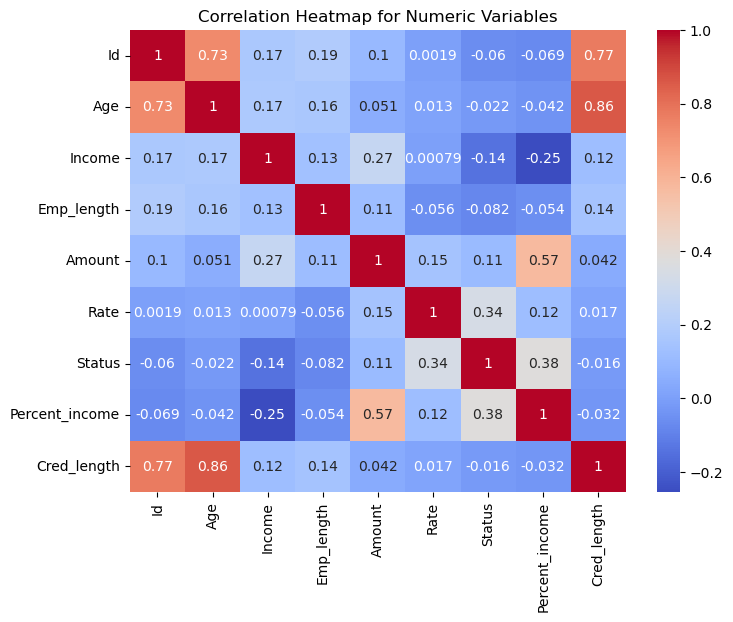

In [21]:
# Correlation between numeric variables
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numeric Variables')
plt.show()

*The data in its uncleaned state doesn't suggest significant correlation between numeric variables.  
Some noteable strong positive correlation exists between `Age` and `Cred_length` (0.86) as well as between `Amount` and `Percent_income` (0.57).*

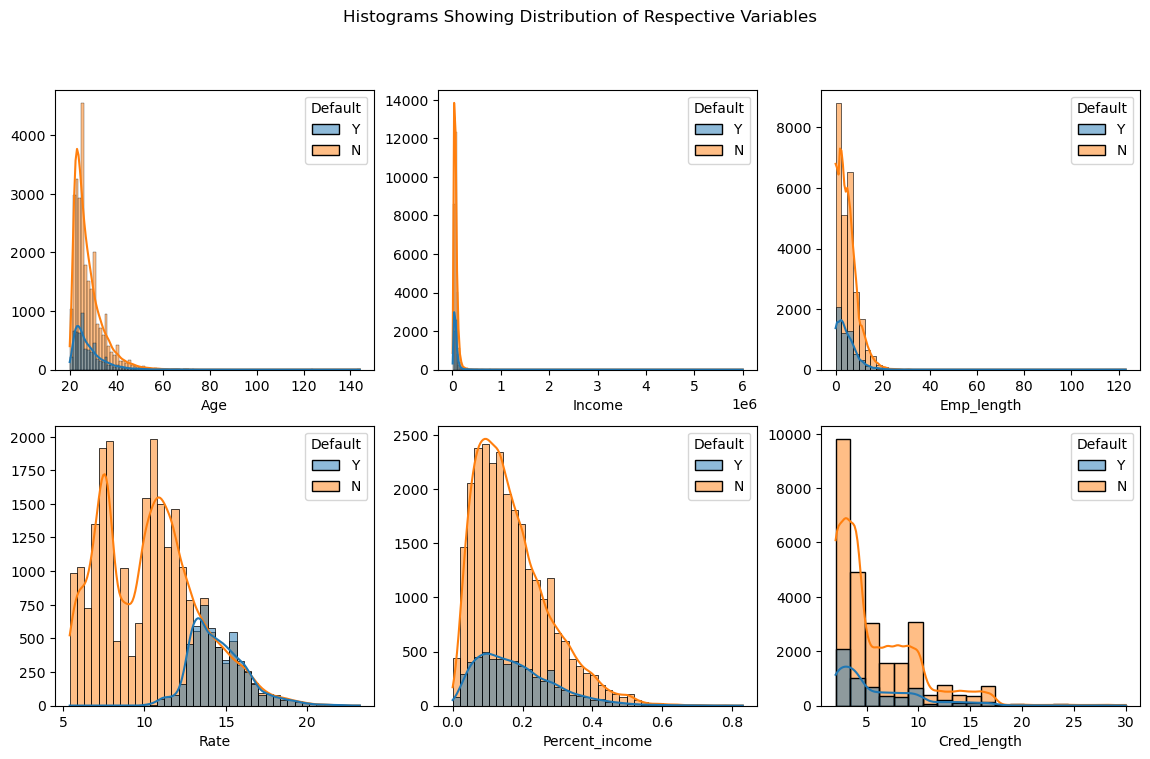

In [23]:
# Histograms to view skewness of some variables
plt.figure(figsize=(14, 8))
plt.suptitle('Histograms Showing Distribution of Respective Variables')

plt.subplot(2, 3, 1)
sns.histplot(data=df, x='Age', bins=100, hue='Default', kde=True, alpha=0.5)
plt.ylabel('')

plt.subplot(2, 3, 2)
sns.histplot(data=df, x='Income', bins=150, hue='Default', kde=True, alpha=0.5)
plt.ylabel('')

plt.subplot(2, 3, 3)
sns.histplot(data=df, x='Emp_length', bins=50, hue='Default', kde=True, alpha=0.5)
plt.ylabel('')

plt.subplot(2, 3, 4)
sns.histplot(data=df, x='Rate', bins=40, hue='Default', kde=True, alpha=0.5)
plt.ylabel('')

plt.subplot(2, 3, 5)
sns.histplot(data=df, x='Percent_income', bins=40, hue='Default', kde=True, alpha=0.5)
plt.ylabel('')

plt.subplot(2, 3, 6)
sns.histplot(data=df, x='Cred_length', bins=20, hue='Default', kde=True, alpha=0.5)
plt.ylabel('')


plt.show()

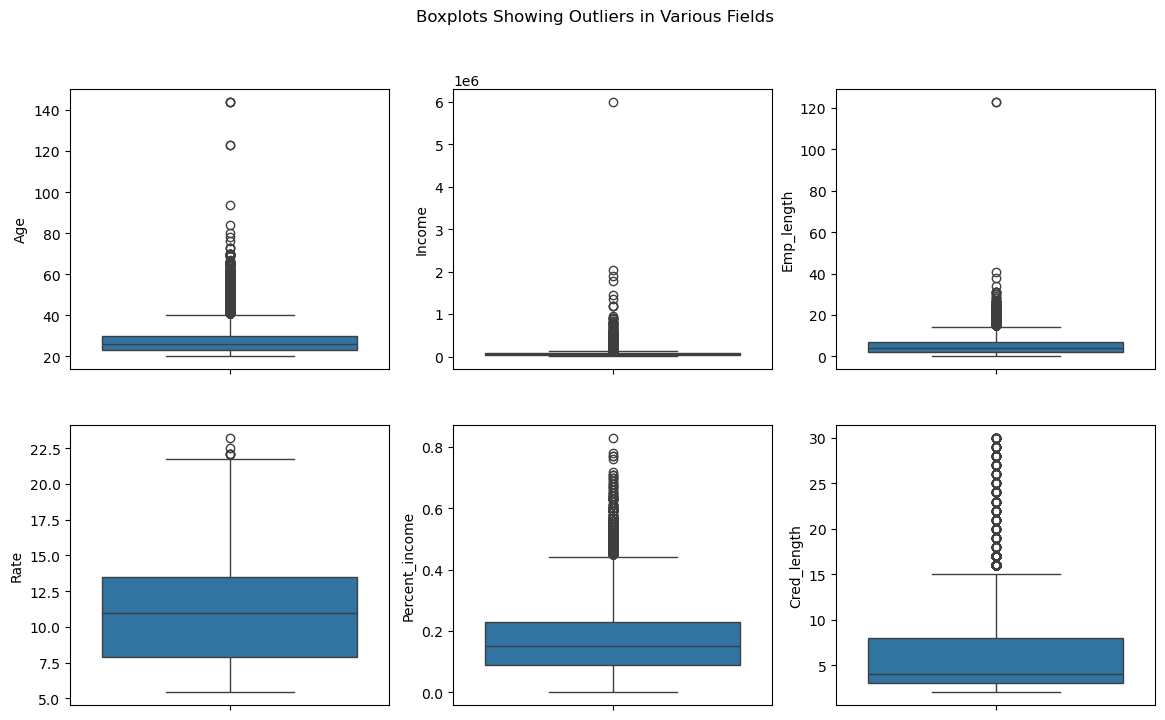

In [24]:
# Boxplots to detect outliers
plt.figure(figsize=(14, 8))
plt.suptitle('Boxplots Showing Outliers in Various Fields')

plt.subplot(2, 3, 1)
sns.boxplot(data=df, y='Age')

plt.subplot(2, 3, 2)
sns.boxplot(data=df, y='Income')

plt.subplot(2, 3, 3)
sns.boxplot(data=df, y='Emp_length')

plt.subplot(2, 3, 4)
sns.boxplot(data=df, y='Rate')

plt.subplot(2, 3, 5)
sns.boxplot(data=df, y='Percent_income')

plt.subplot(2, 3, 6)
sns.boxplot(data=df, y='Cred_length')


plt.show()

*From the histograms and boxplots, it is clear that the respective variables are right-skewed; some more severe that others.  
There also exist a significant number of outliers.  
Outliers will be handled in the data cleaning stage.*

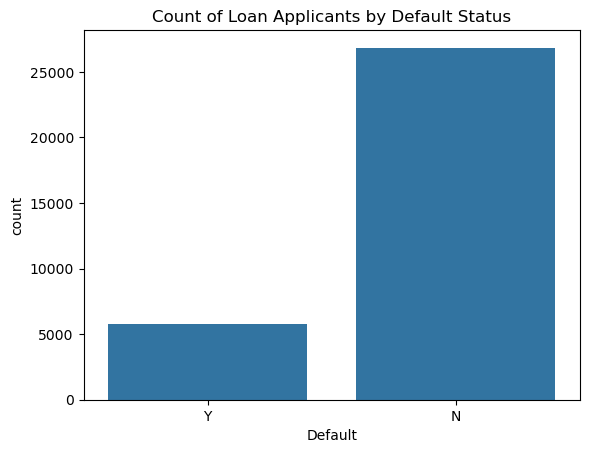

In [26]:
# Number of observations for Defaulters and Non-Defaulters
sns.countplot(data=df, x='Default')
plt.title('Count of Loan Applicants by Default Status')
plt.show()

*Number of non-defaulters significantly outweigh defaulters, indicating that we're working with an imbalanced dataset.*

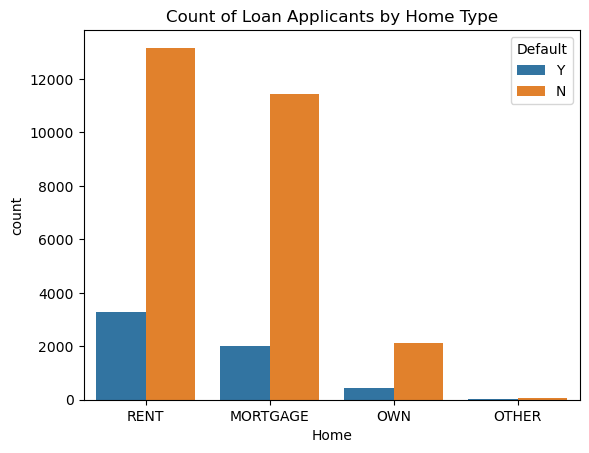

In [28]:
# Count observations by home type
home_order = df['Home'].value_counts().index
sns.countplot(data=df, x='Home', hue='Default', order=home_order)
plt.title('Count of Loan Applicants by Home Type')
plt.show()

*Most loan applicants rent their homes, followed by mortage, owners, then other.  
With respect to defaulters, the observation follows the same order, in that, the largest proportion of defaulters live on rent, followed by mortage, owners, then other.*

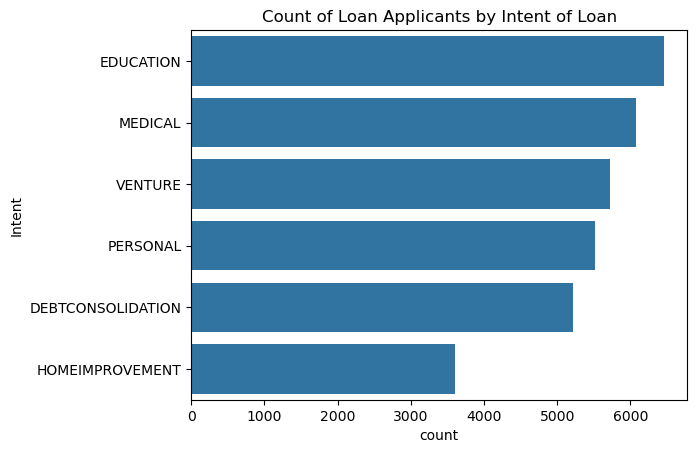

In [30]:
# Count observatations by intent
intent_order = df['Intent'].value_counts().index
sns.countplot(data=df, y='Intent', order=intent_order)
plt.title('Count of Loan Applicants by Intent of Loan')
plt.show()

*It is interesting to note that most borrowers borrowed for Educational purposes, while the least represented class borrowed with the intent of home improvement.*

## Data Cleaning

In [33]:
# Creating a copy of dataset for manipulation
loan_df = df.copy()

In [34]:
# Ensuring that field names conform to standard convention
loan_df.columns = loan_df.columns.str.lower()

In [35]:
# Changing datatypes
loan_df['id'] = loan_df['id'].astype('object')

categorical_cols = ['home', 'intent', 'default']
for col in categorical_cols:
    loan_df[col] = loan_df[col].astype('category')

In [36]:
# Columns values are originally in uppercase
loan_df['home'] = loan_df['home'].apply(str.capitalize)
loan_df['intent'] = loan_df['intent'].apply(str.capitalize)

In [37]:
# dropping instance where emp_length is 123
ind = loan_df[loan_df['emp_length'] == 123].index
loan_df.drop(index=ind, inplace=True)

In [38]:
loan_df['emp_length'].describe()

count    31684.000000
mean         4.782224
std          4.034888
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         41.000000
Name: emp_length, dtype: float64

In [39]:
# Concise summary of dataframe
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32579 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id              32579 non-null  object  
 1   age             32579 non-null  int64   
 2   income          32579 non-null  int64   
 3   home            32579 non-null  category
 4   emp_length      31684 non-null  float64 
 5   intent          32579 non-null  category
 6   amount          32579 non-null  int64   
 7   rate            29463 non-null  float64 
 8   status          32579 non-null  int64   
 9   percent_income  32579 non-null  float64 
 10  default         32579 non-null  category
 11  cred_length     32579 non-null  int64   
dtypes: category(3), float64(3), int64(5), object(1)
memory usage: 2.6+ MB


In [40]:
# Viewing first 10 rows
loan_df.head(10)

,id,age,income,home,emp_length,intent,amount,rate,status,percent_income,default,cred_length
1,1,21,9600,Own,5.0,Education,1000,11.14,0,0.10,N,2
2,2,25,9600,Mortgage,1.0,Medical,5500,12.87,1,0.57,N,3
3,3,23,65500,Rent,4.0,Medical,35000,15.23,1,0.53,N,2
4,4,24,54400,Rent,8.0,Medical,35000,14.27,1,0.55,Y,4
5,5,21,9900,Own,2.0,Venture,2500,7.14,1,0.25,N,2
6,6,26,77100,Rent,8.0,Education,35000,12.42,1,0.45,N,3
7,7,24,78956,Rent,5.0,Medical,35000,11.11,1,0.44,N,4
8,8,24,83000,Rent,8.0,Personal,35000,8.90,1,0.42,N,2
9,9,21,10000,Own,6.0,Venture,1600,14.74,1,0.16,N,3
10,10,22,85000,Rent,6.0,Venture,35000,10.37,1,0.41,N,4


### Dealing with Null Values

*Dealing with null values in `emp_length` column.*

*The approach we decided on was to impute null values in the `emp_length` column based on the median values for some age buckets.  
We therefore created a new column (age_group) which contained age categories.  
The medians for the respective age buckets were computed and imputed to `emp_length`'s null values.  
The mean values could not be used due to the skewness of the variable.*

In [44]:
# Bin ages into intervals
bins = [19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 89, 94, 99]
labels = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69',
          '70-74', '75-79', '80-84', '85-89', '90-94', '95-99']

loan_df['age_group'] = pd.cut(loan_df['age'], bins=bins, labels=labels)

In [45]:
loan_df.head()

,id,age,income,home,emp_length,intent,amount,rate,status,percent_income,default,cred_length,age_group
1,1,21,9600,Own,5.0,Education,1000,11.14,0,0.10,N,2,20-24
2,2,25,9600,Mortgage,1.0,Medical,5500,12.87,1,0.57,N,3,25-29
3,3,23,65500,Rent,4.0,Medical,35000,15.23,1,0.53,N,2,20-24
4,4,24,54400,Rent,8.0,Medical,35000,14.27,1,0.55,Y,4,20-24
5,5,21,9900,Own,2.0,Venture,2500,7.14,1,0.25,N,2,20-24


C:\Users\micha\AppData\Local\Temp\ipykernel_5844\3574097750.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(kind='kde', data=loan_df, x='emp_length', col='age_group', col_wrap=4, fill=True)


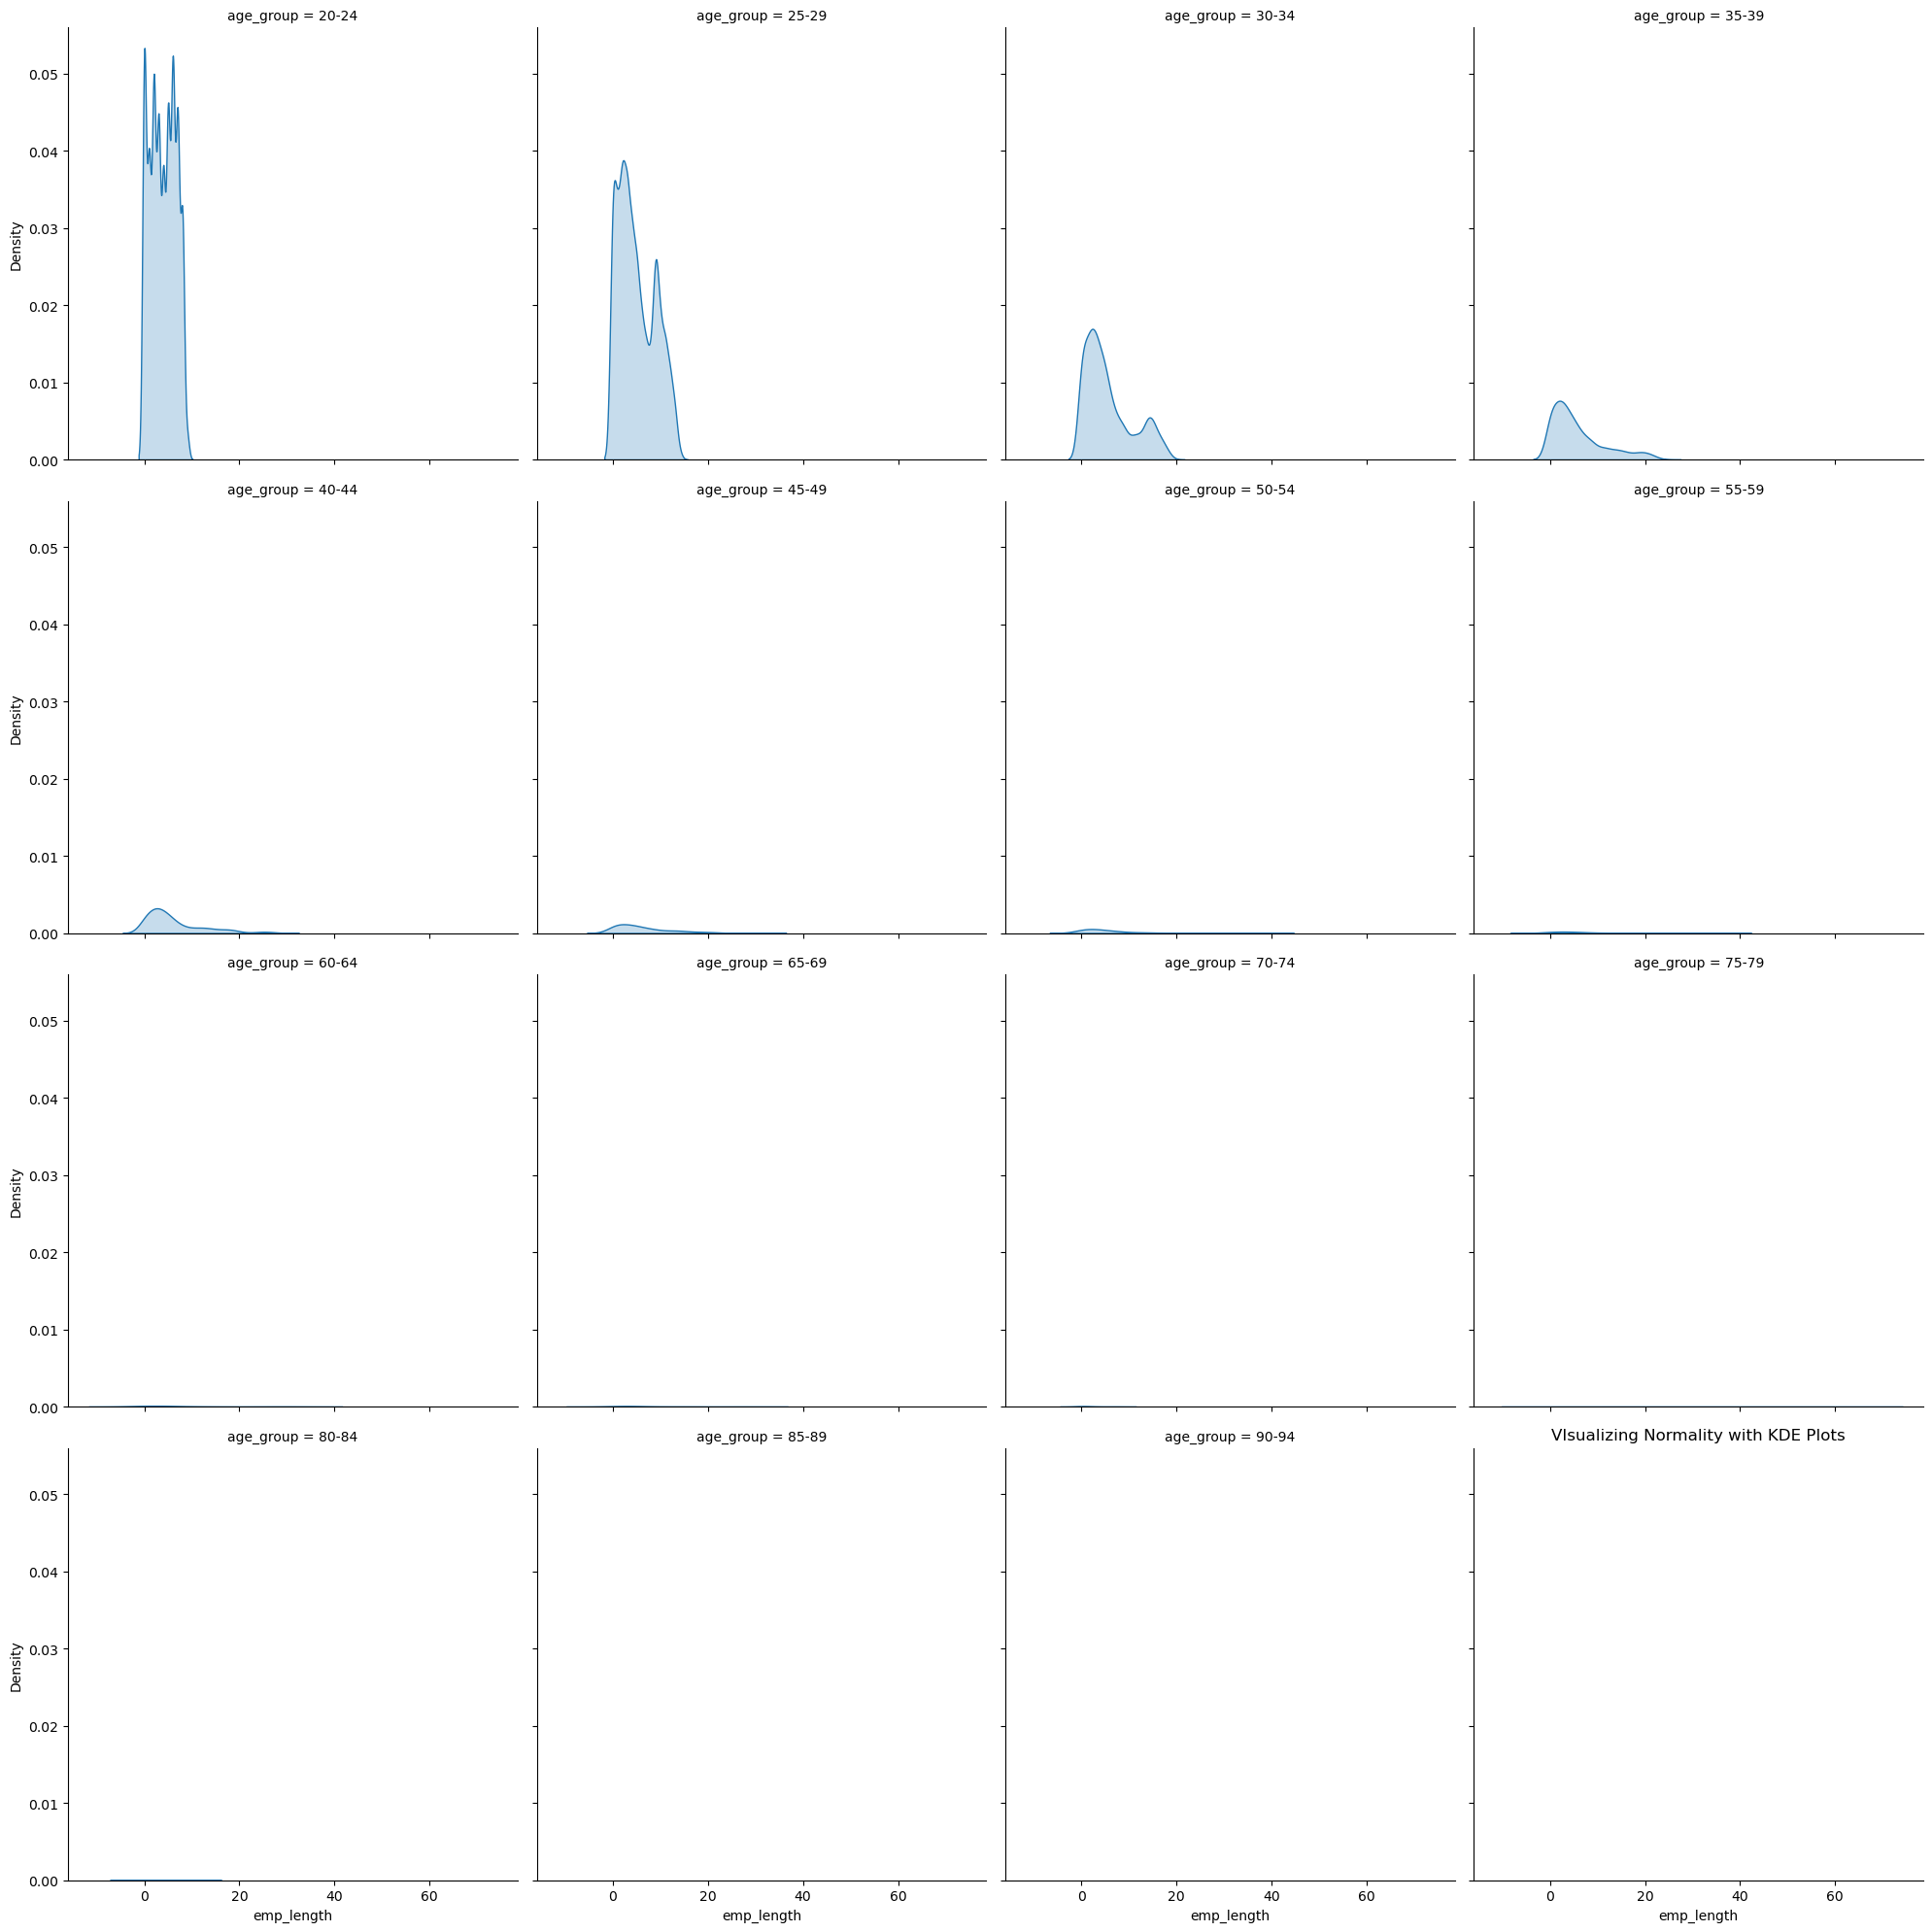

In [46]:
# Assessing normality of distributions
sns.displot(kind='kde', data=loan_df, x='emp_length', col='age_group', col_wrap=4, fill=True)
plt.title('VIsualizing Normality with KDE Plots')
plt.show()

In [47]:
# Descriptive statistics
loan_df['age_group'].describe()

count     32574
unique       14
top       20-24
freq      12313
Name: age_group, dtype: object

*Notice the count=32,576 instead of the total 32,581 records.  
Some 5 records were not catered for.  
The cell below explains this.  Age buckets covered age 20 to 100, but these ages exceed 100.  
Some ages were not categorized because they didn't fall within the specified age buckets*

In [49]:
# non-categorized ages
loan_df[loan_df['age_group'].isna()]

,id,age,income,home,emp_length,intent,amount,rate,status,percent_income,default,cred_length,age_group
81,81,144,250000,Rent,4.0,Venture,4800,13.57,0,0.02,N,3,NaN
183,183,144,200000,Mortgage,4.0,Education,6000,11.86,0,0.03,N,2,NaN
575,575,123,80004,Rent,2.0,Education,20400,10.25,0,0.25,N,3,NaN
747,747,123,78000,Rent,7.0,Venture,20000,NaN,0,0.26,N,4,NaN
32297,32297,144,6000000,Mortgage,12.0,Personal,5000,12.73,0,0.00,N,25,NaN


In [50]:
# Taking out extreme ages
loan_df = loan_df[~loan_df['age_group'].isna()]

In [51]:
loan_df.shape

(32574, 13)

In [52]:
# Frequency of each category
loan_df['age_group'].value_counts()

age_group
20-24    12313
25-29    11193
30-34     4987
35-39     2321
40-44     1005
45-49      420
50-54      181
55-59       74
60-64       41
65-69       24
70-74       10
75-79        2
80-84        2
90-94        1
85-89        0
95-99        0
Name: count, dtype: int64

In [53]:
# Ceating dictionary containing age group median values
median_emp_length = loan_df.groupby(by='age_group', observed=True)['emp_length'].median().to_dict()

In [54]:
# Imputing missing values with median
loan_df['emp_length'] = loan_df['emp_length'].fillna(loan_df['age_group'].map(median_emp_length))

In [55]:
# Changing datatype
loan_df['emp_length'] = loan_df['emp_length'].astype('int32')

In [56]:
# Checking if imputation was successful
loan_df.isna().sum()

id                   0
age                  0
income               0
home                 0
emp_length           0
intent               0
amount               0
rate              3115
status               0
percent_income       0
default              0
cred_length          0
age_group            0
dtype: int64

*Dealing with null values im `rate` column*

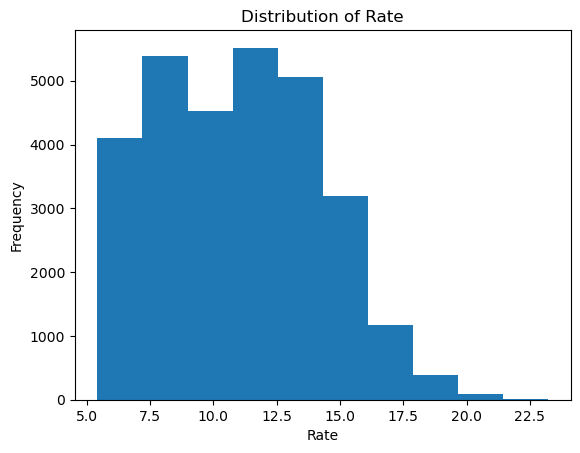

In [58]:
# Histogram for rate
loan_df.hist('rate', grid=False)
plt.title('Distribution of Rate')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()

*The mean would not be a good option for imputation of null values, given the skewness of the distribution.  
Therefore, the median will be used.*

In [60]:
# Imputing missing values with median
loan_df['rate'] = loan_df['rate'].fillna(loan_df['rate'].median())

In [61]:
# Checking if imputation was successful
loan_df.isna().sum()

id                0
age               0
income            0
home              0
emp_length        0
intent            0
amount            0
rate              0
status            0
percent_income    0
default           0
cred_length       0
age_group         0
dtype: int64

**Noteworthy:**  

*Using the iqr method to remove outliers in `[age, income, emp_length, percent_income]` columns causes too much data `(>15%)` to be lost.  
We therefore, decided to handle outliers with a different approach.*  

*Firstly, we would use tree-based models. These models are less sensitive to outliers because they split the data based on thresholds and are not affected by extreme values in the same way as linear models.  
Also, we will employ the use of Robust Scaler which scales features according to the interquartile range, which reduces the impact of outliers.*  

There are several other methods to attack this problem such as power transformation and log transformation. However for this project, we stick to the approach prposed above.

## Building A Predictive Model

In [64]:
# Packages for machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

### Data Presprocessing

In [66]:
loan_df.head()

,id,age,income,home,emp_length,intent,amount,rate,status,percent_income,default,cred_length,age_group
1,1,21,9600,Own,5,Education,1000,11.14,0,0.10,N,2,20-24
2,2,25,9600,Mortgage,1,Medical,5500,12.87,1,0.57,N,3,25-29
3,3,23,65500,Rent,4,Medical,35000,15.23,1,0.53,N,2,20-24
4,4,24,54400,Rent,8,Medical,35000,14.27,1,0.55,Y,4,20-24
5,5,21,9900,Own,2,Venture,2500,7.14,1,0.25,N,2,20-24


In [67]:
# Encoding categorical columns
loan_df_encoded = pd.get_dummies(data=loan_df, columns=['home', 'intent', 'age_group'], drop_first=True)

In [68]:
# Explanatory variables
X = loan_df_encoded.drop(columns=['id', 'default', 'status', 'age'])

Reasons for dropping above fields:  
- `default` is the target variable  
- `age` is already represented by `age_group`  
- `id` does not explain `default`  
- Upon inspection, `status` column is invalid. It had only 2 distinct values instead of 3 (according to the dataset description). Also, it was not consistent with some other fields. In effect, from the business context, `status` in its current state cannot be used.

In [70]:
# Target variable
y = loan_df_encoded['default']

In [71]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=50)

### Dealing with Imbalance

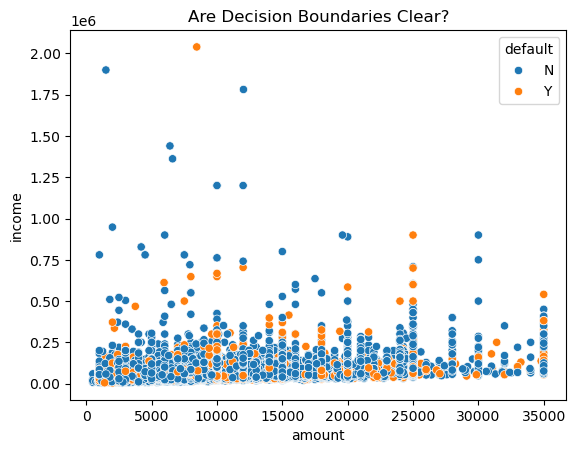

In [73]:
# What will decision boundaries look like before resampling
sns.scatterplot(data=loan_df, x='amount', y='income', hue='default')
plt.title('Are Decision Boundaries Clear?')
# plt.yscale('log')
plt.show()

In [74]:
from imblearn.combine import SMOTETomek
from collections import Counter

In [75]:
sm_tomek = SMOTETomek(random_state=50)
X_resampled, y_resampled = sm_tomek.fit_resample(X_train, y_train)

In [76]:
c = Counter(y_resampled)
c

Counter({'N': 18250, 'Y': 18250})

After applying a hybrid resampling technique, there are 18,250 instances for each default status.  
36,500 rows in total for resampled dataset.

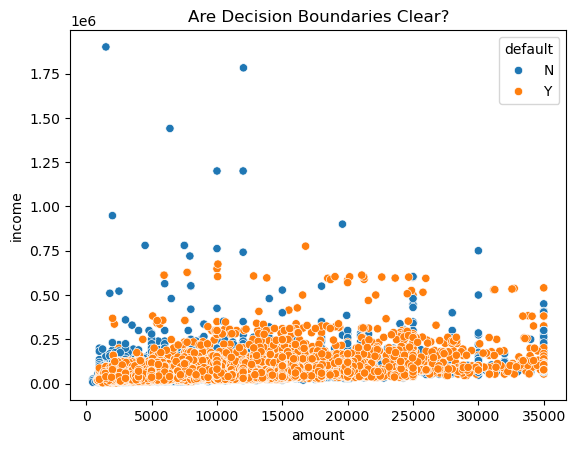

In [78]:
resamp_df = pd.concat([X_resampled, y_resampled], axis=1)

# What will decision boundaries look like after resampling
sns.scatterplot(data=resamp_df, x='amount', y='income', hue='default')
plt.title('Are Decision Boundaries Clear?')
# plt.yscale('log')
plt.show()

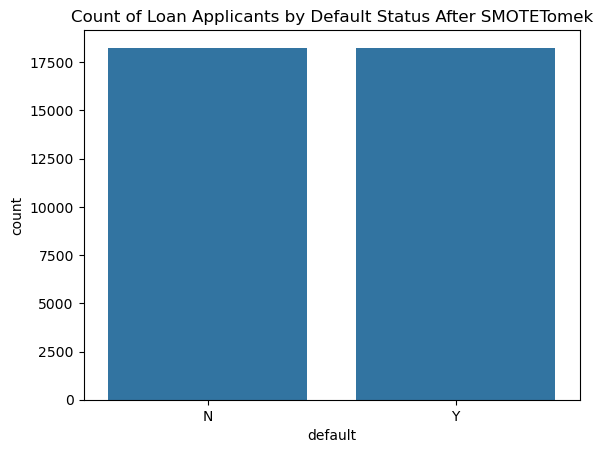

In [128]:
# Number of observations for Defaulters and Non-Defaulters
sns.countplot(data=resamp_df, x='default')
plt.title('Count of Loan Applicants by Default Status After SMOTETomek')
plt.show()

### Model Development & Training

Three models were trained:
- Logistic Regression
- Random Forest Classifier
- Gradient Boosting Classifier*

**Grid Search**

In [319]:
# Pipeline with LogisticRegression as the placeholder model
pipeline = Pipeline([
    ('scaler', RobustScaler()), 
    ('model', LogisticRegression(random_state=50))
])

In [232]:
# Dict of parameters for grid search
param_grid = [
    # Parameters for Logistic Regression
    {
        'model': [LogisticRegression(random_state=50)],
        'model__C': [0.01, 0.1, 1.0]
    },
    # Parameters for Random Forest 
    {
        'model': [RandomForestClassifier(random_state=50)],
        'model__n_estimators': [100, 200, 300, 500],
        'model__max_depth': [5, 10, 20]
    },
    # Parameters for Gradient Boosting
    {
        'model': [GradientBoostingClassifier(random_state=50)],
        'model__n_estimators': [100, 200, 300, 500],
        'model__max_depth': [5, 10, 20]
    }
    ]

In [234]:
# Defining grid object
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='roc_auc', refit=True)

In [236]:
# Fitting the model
grid_search.fit(X_resampled, y_resampled)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('model',
                                        LogisticRegression(random_state=50))]),
             param_grid=[{'model': [LogisticRegression(random_state=50)],
                          'model__C': [0.01, 0.1, 1.0]},
                         {'model': [RandomForestClassifier(random_state=50)],
                          'model__max_depth': [5, 10, 20],
                          'model__n_estimators': [100, 200, 300, 500]},
                         {'model': [GradientBoostingClassifier(random_state=50)],
                          'model__max_depth': [5, 10, 20],
                          'model__n_estimators': [100, 200, 300, 500]}],
             scoring='roc_auc')

**Voting**

In [130]:
# Combine classifiers in a voting classifier
vote = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=500, max_depth=20, random_state=50)),
        ('lr', LogisticRegression(max_iter=1000)),
        ('gb', GradientBoostingClassifier(random_state=50))
    ], 
    voting='hard')  # Use 'hard' for majority vote or 'soft' for probability-based voting

In [132]:
# Pipeline for voteing model
pipeline2 = Pipeline([
    ('scaler', StandardScaler()),
    ('vote_clf', vote)
])

In [134]:
# Fitting the model
pipeline2.fit(X_resampled, y_resampled)

Pipeline(steps=[('scaler', StandardScaler()),
                ('vote_clf',
                 VotingClassifier(estimators=[('rf',
                                               RandomForestClassifier(max_depth=20,
                                                                      n_estimators=500,
                                                                      random_state=50)),
                                              ('lr',
                                               LogisticRegression(max_iter=1000)),
                                              ('gb',
                                               GradientBoostingClassifier(random_state=50))]))])

**Bagging**

In [136]:
# Weak base estimator
dt_clf = DecisionTreeClassifier(max_depth=4)

In [138]:
# Bagging classifier
bag_clf = BaggingClassifier(estimator=dt_clf, n_estimators=20, random_state=50)

In [140]:
# Pipeline for bagging classifier
pipeline3 = Pipeline([
    ('scaler', RobustScaler()),
    ('bagging_clf', bag_clf)
])

In [142]:
# Fitting the model
pipeline3.fit(X_resampled, y_resampled)

Pipeline(steps=[('scaler', RobustScaler()),
                ('bagging_clf',
                 BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=4),
                                   n_estimators=20, random_state=50))])

**Boosting**

In [144]:
# One of the boosting ensemble methods
adaboost_clf = AdaBoostClassifier(estimator=dt_clf, n_estimators=20, random_state=50)

In [146]:
# Pipeline for bagging classifier
pipeline4 = Pipeline([
    ('scaler', RobustScaler()),
    ('boosting_clf', adaboost_clf)
])

In [148]:
# Fitting the model
pipeline4.fit(X_resampled, y_resampled)

C:\Users\micha\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Pipeline(steps=[('scaler', RobustScaler()),
                ('boosting_clf',
                 AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=4),
                                    n_estimators=20, random_state=50))])

### Model Perfomance Evaluation

**Grid Search Object**

In [242]:
grid_search.best_estimator_

Pipeline(steps=[('scaler', RobustScaler()),
                ('model',
                 GradientBoostingClassifier(max_depth=20, n_estimators=500,
                                            random_state=50))])

In [244]:
grid_search.best_params_

{'model': GradientBoostingClassifier(random_state=50),
 'model__max_depth': 20,
 'model__n_estimators': 500}

In [327]:
grid_search.best_score_

0.9816550797522987

In [393]:
# Prediction
y_pred_grid = grid_search.predict(X_test)

tn - true negatives  
tp - true postives  
fn - false negatives  
fp - false postives

In [395]:
# Confusion matrix for grid model
tn_g, fp_g, fn_g, tp_g = confusion_matrix(y_test, y_pred_grid).ravel()
(tn_g, fp_g, fn_g, tp_g)

(5782, 926, 523, 913)

In [541]:
# Classification report for grid model
report_grid = classification_report(y_test, y_pred_grid, output_dict=True)

**Voting**

In [150]:
# Prediction
y_pred_vote = pipeline2.predict(X_test)

In [151]:
# Confusion matrix for voting model
tn_v, fp_v, fn_v, tp_v = confusion_matrix(y_test, y_pred_vote).ravel()
(tn_v, fp_v, fn_v, tp_v)

(5632, 1076, 364, 1072)

In [154]:
# Clasification report
report_voting = classification_report(y_test, y_pred_vote, output_dict=True)

**Bagging**

In [156]:
# Prediction
y_pred_bag = pipeline3.predict(X_test)

In [158]:
# Confusion matrix for voting model
tn_v, fp_v, fn_v, tp_v = confusion_matrix(y_test, y_pred_bag).ravel()
(tn_v, fp_v, fn_v, tp_v)

(5325, 1383, 180, 1256)

In [160]:
# Clasification report
report_bagging = classification_report(y_test, y_pred_bag, output_dict=True)

**Boosting**

In [162]:
# Prediction
y_pred_boost = pipeline4.predict(X_test)

In [164]:
# Confusion matrix for voting model
tn_v, fp_v, fn_v, tp_v = confusion_matrix(y_test, y_pred_boost).ravel()
(tn_v, fp_v, fn_v, tp_v)

(5729, 979, 475, 961)

In [166]:
# Clasification report
report_boosting = classification_report(y_test, y_pred_boost, output_dict=True)

### Visualizing metrics

In [543]:
# Extracting precision scores for each model (for the positive class 'Y')
precision_grid = report_grid['Y']['precision']
precision_vote = report_voting['Y']['precision']
precision_bagging = report_bagging['Y']['precision']
precision_boosting = report_boosting['Y']['precision']

models = ['Grid Search', 'Voting', 'Bagging', 'Boosting']
precisions = [precision_grid, precision_vote, precision_bagging, precision_boosting]

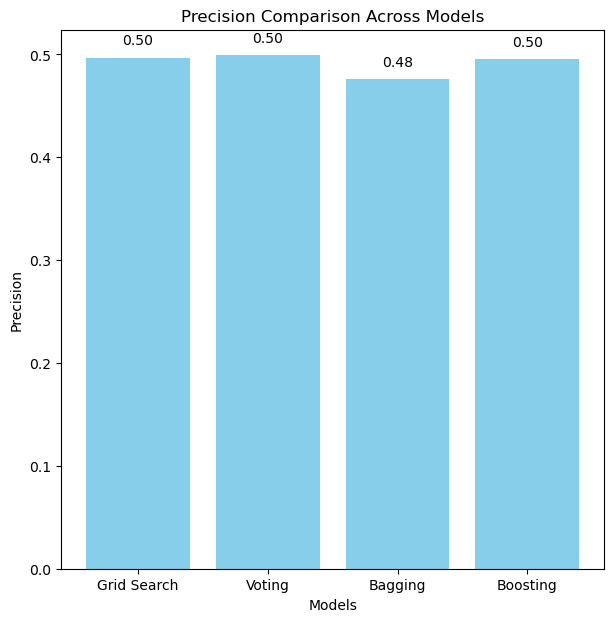

In [553]:
# Visualizing precision scores
plt.figure(figsize=(7,7))
plt.bar(models, precisions, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Precision Comparison Across Models')
for i, value in enumerate(precisions):
    plt.text(i, value + 0.01, f"{value:.2f}", ha='center', va='bottom')
plt.show()

In [555]:
# Extracting recall scores for each model (for the positive class 'Y')
recall_grid = report_grid['Y']['recall']
recall_vote = report_voting['Y']['recall']
recall_bagging = report_bagging['Y']['recall']
recall_boosting = report_boosting['Y']['recall']

models = ['Grid Search', 'Voting', 'Bagging', 'Boosting']
recalls = [recall_grid, recall_vote, recall_bagging, recall_boosting]

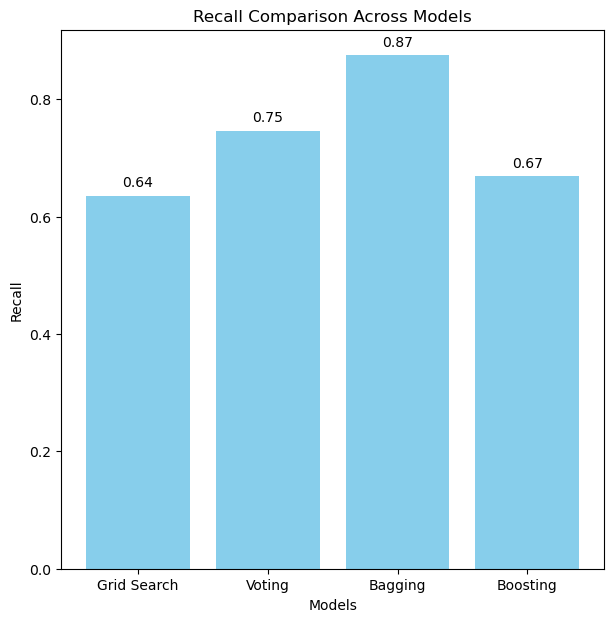

In [557]:
# Visualizing recall scores
plt.figure(figsize=(7,7))
plt.bar(models, recalls, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall Comparison Across Models')
for i, value in enumerate(recalls):
    plt.text(i, value + 0.01, f"{value:.2f}", ha='center', va='bottom')
plt.show()

In [563]:
# Extracting f1 scores for each model (for the positive class 'Y')
f1_grid = report_grid['Y']['f1-score']
f1_vote = report_voting['Y']['f1-score']
f1_bagging = report_bagging['Y']['f1-score']
f1_boosting = report_boosting['Y']['f1-score']

models = ['Grid Search', 'Voting', 'Bagging', 'Boosting']
f1_scores = [f1_grid, f1_vote, f1_bagging, f1_boosting]

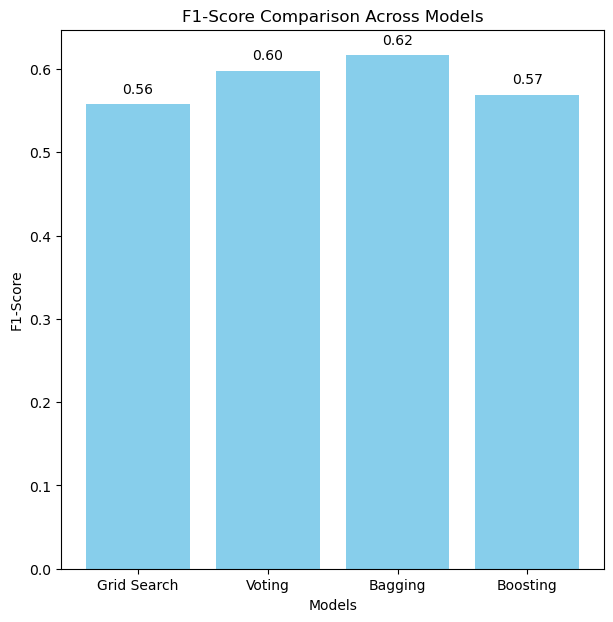

In [565]:
# Visualizing f1 scores
plt.figure(figsize=(7,7))
plt.bar(models, f1_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('F1-Score')
plt.title('F1-Score Comparison Across Models')
for i, value in enumerate(f1_scores):
    plt.text(i, value + 0.01, f"{value:.2f}", ha='center', va='bottom')
plt.show()

### Model Selection

Importance: Recall for the "Y" class (default) is critical if you want to minimize the risk of missing potential defaulters. A high recall ensures that most actual defaulters are identified, even if it means having some false positives (non-defaulters incorrectly flagged as defaulters).
Example: If a bank wants to avoid giving loans to people likely to default at any cost, maximizing recall is crucial. Missing defaulters (false negatives) could be financially damaging.

In [192]:
# Saving the chosen model for streamlit app
# import pickle
# pickle.dump(pipeline3, open('pipeline.pkl', 'wb')) 

Importance: Precision for the "Y" class is important if you want to minimize the number of people incorrectly flagged as potential defaulters. High precision means that when you predict someone will default, you are usually correct.
Example: If a bank is concerned about wrongly denying loans to reliable customers (false positives), then precision is more important.

## Conclusion and Recommendations

- The best recall score for classification among all models trained was **0.87** (Bagging classifier, with decision tree as the base estimator).
  
- However, an in-depth hyperparameter-tuning is most likely assured to yield better results.
  
- Perhaps it's possible that imputing `rate`'s null values similar to how `emp_length`'s was handled could be more representative of the data?
  
- Upon a deeper understanding of the business context, some feature engineering could be undertaken to better explain `default` outcome.
  
- Some statistical analysis *(such as ANOVA)* could be performed to assess the effect of the various categorical columns on the target variable. Are there any that affect the model negatively?
  
- In general, we believe that much more varied preprocessing steps of the data could be explored, taking into consideration, hypothesis testing, different methods of handling null values and outliers, as well as other approaches. A machine learning model's performance is as good as the data fed to it.

- So much more can definitely be done with more time spent on this task.

# THANK YOU